In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('kc_house_data_train.csv')


In [5]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


## Data Cleaning


In [6]:
## change the date column to the right format-- 
df['date'] = df['date'].str.replace('T000000','')
df.astype({'date' : 'str'}).dtypes
type(df['date'][0])



str

In [14]:
df['yr_renovated'].min()

0

In [15]:
## call the date-time to change the columns to date 
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')



In [16]:
df['date'].describe()

count                   17290
unique                    371
top       2014-06-25 00:00:00
freq                      111
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
Unnamed: 0       17290 non-null int64
id               17290 non-null int64
date             17290 non-null datetime64[ns]
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: datetime64[ns](1), float64(5

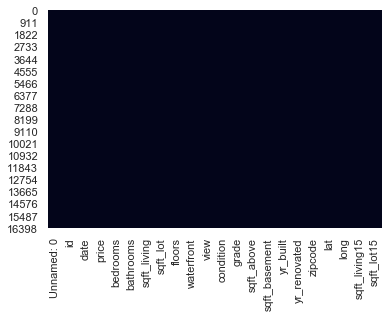

In [11]:
## checking for null values.
sns.heatmap(df.isnull(), cbar=False)


In [18]:
## drop the Unnecessary columns 
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [36]:
df['bedrooms'].max()

33

In [41]:
df['price'].mean()

540739.5486408329

{'whiskers': [<matplotlib.lines.Line2D at 0x1a297f09b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a297f40f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a297f0668>],
 'medians': [<matplotlib.lines.Line2D at 0x1a297f47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a297f4eb8>],
 'means': [<matplotlib.lines.Line2D at 0x1a297f4b70>]}

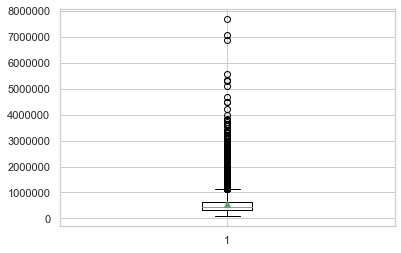

In [40]:
plt.boxplot(df['price'],showmeans=True)

In [21]:
df.dtypes


date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [23]:
df.waterfront

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: waterfront, Length: 17290, dtype: int64

In [25]:
# Get the categorical data 
df.astype({'waterfront': 'category', 'view' : 'category', 'condition' : 'category', 'grade' : 'category'}).dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [26]:
df.waterfront

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: waterfront, Length: 17290, dtype: int64

In [27]:
#list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  20


In [28]:
# visualise the numerical variables
df[num_vars].head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [29]:
df['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [30]:
cat_vars = ['waterfront', 'view', 'condition', 'grade']

In [31]:
cat_vars

['waterfront', 'view', 'condition', 'grade']

## EDA

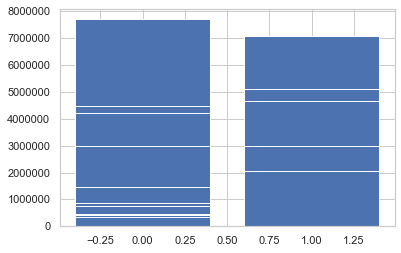

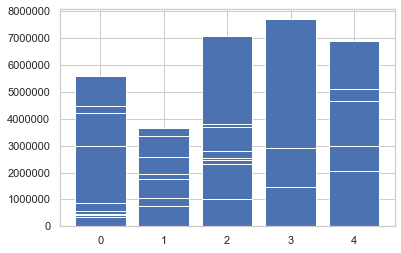

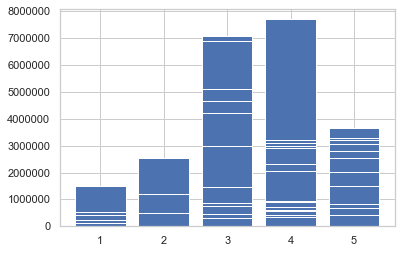

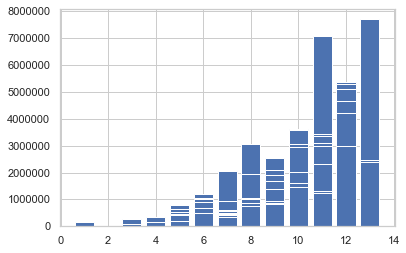

In [32]:
# plot the categorical data to look for insights on data 
for cat in cat_vars:
    plt.bar(x=df[cat], height=df['price'])
    plt.show()

In [34]:
## 
year_vars = [var for var in num_vars if 'yr' in var or 'Year' in var or 'date' in var]
year_vars

['date', 'yr_built', 'yr_renovated']

In [ ]:
for var in year_vars:
    print(var, df[var].unique())
    print()


Text(0.5, 1.0, 'Change in House price with the years')

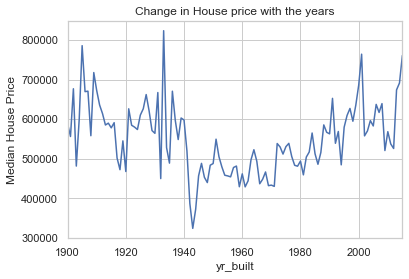

In [44]:
## plot of the mean house price in comparison to the yr_built 
df.groupby('yr_built')['price'].mean().plot()
plt.ylabel('Mean House Price')
plt.title('Change in House price with the years')

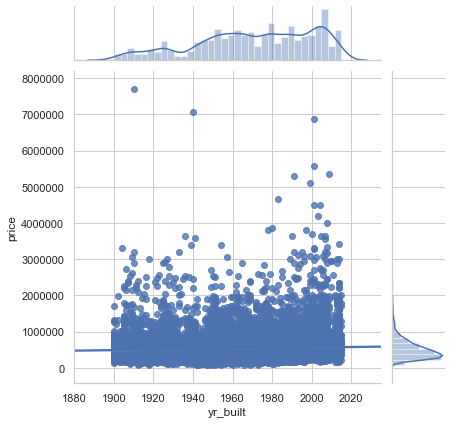

In [46]:
## 
sns.jointplot(x='yr_built', y='price', data=df, kind="reg")

## Feature Enginerring 